Que.Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import the data
company = pd.read_csv("/content/Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
# Check in the statistics
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
# Check of null values
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
# Checking the duplicates values
company[company.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [17]:
# Take high sales above at 7.49 beacause it is the average of sales.
company["salestype"]=(company["Sales"]>7.49)*1

In [18]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salestype
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [22]:
#Create numerical variable for categorical data
label_encoder=preprocessing.LabelEncoder()
company["ShelveLoc"]=label_encoder.fit_transform(company["ShelveLoc"])
company["Urban"]=label_encoder.fit_transform(company["Urban"])
company["US"]=label_encoder.fit_transform(company["US"])

In [23]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,salestype
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [31]:
#Creating a dataframe with all independent variables
x=company.iloc[:,1:9]

In [33]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education
0,138,73,11,276,120,0,42,17
1,111,48,16,260,83,1,65,10
2,113,35,10,269,80,2,59,12
3,117,100,4,466,97,2,55,14
4,141,64,3,340,128,0,38,13
...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14
396,139,23,3,37,120,2,55,11
397,162,26,12,368,159,2,40,18
398,100,79,7,284,95,0,50,12


In [36]:
#Creating a dataframe with the target variable
y=company.iloc[:,-1].values

In [38]:
y

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [48]:
# Use k-fold.
kfold=KFold(n_splits=10,random_state=42,shuffle=True) 

In [50]:
# Constructing a Random forest classfier model
model = RandomForestClassifier(n_estimators=110, max_features=6)

In [54]:
#Evaluating the cross validation score 
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.8175000000000001


In [57]:
# Using train & test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [62]:
# Fitting the mode
model.fit(x_train,y_train)

RandomForestClassifier(max_features=6, n_estimators=110)

In [65]:
#Predicting the model on the train data, to evaluate the train accuracy
Y_pred=model.predict(x_train)

In [67]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


In [71]:
# Find the train accuracy.
model.score(x_train, y_train)


1.0

In [74]:
#Predicting the model on the test data
y_pred=model.predict(x_test)

In [77]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.775


In [81]:
#Find the test accuracy.
model.score(x_test, y_test)

0.775

In [87]:
model.predict([[110,100,4,466,97,2,55,14,]])

array([0])

In [91]:
# Identifying the important features that contribute to the output.
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

Price          0.296152
CompPrice      0.161155
ShelveLoc      0.138606
Age            0.125758
Income         0.098126
Population     0.072720
Advertising    0.067791
Education      0.039691
dtype: float64

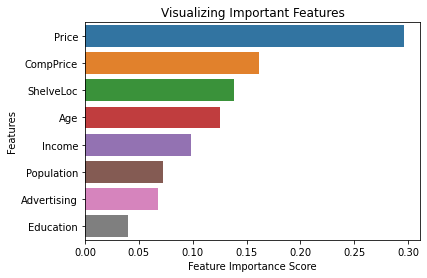

In [107]:
# Create the bar Chart.
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [119]:
#Running a loop from the range of 1 to 10 for different max_features in the Random forest classifier
train_accuracy = []
test_accuracy = []
for max_features in range(1,10):
    model=RandomForestClassifier(n_estimators=110, max_features=5)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [124]:
#Jotting down the test accuracies.
data = pd.DataFrame({'max_features':range(1,10),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.766667
1,2,1.0,0.750000
2,3,1.0,0.783333
3,4,1.0,0.791667
4,5,1.0,0.766667
5,6,1.0,0.775000
6,7,1.0,0.766667
7,8,1.0,0.766667
8,9,1.0,0.783333


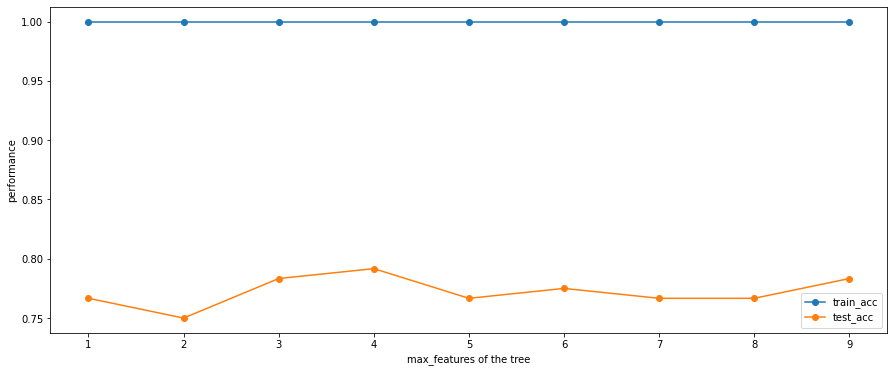

In [141]:
# Visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = 'o')
plt.plot(data['max_features'], data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()

The Random forest classifier with the maximum feature as three gives the highest accuracy of 83.33%.